In [ ]:
# 315903518 - ori nissim
# please note that there are small examples of the data through out the file simply for the easier calculation and quick testing, which can be changed easily to requied size

#  Dataset Preprocessing

---


*   A good dataset is a key for successful model training.

*   This assignment guides you how to create two labeled datasets, which could later be used for
supervised learning.

---

## Overview

Image augmentations are used to increase the variability and robustness of a dataset

## Goals - Create a larger dataset from a smaller one



---


### Goals
1. 

  *   The original MNIST dataset includes images of single digits, in ten classes.
  *   Your goal is to create a new three-digit image dataset, with 101 classes, based on the original MNIST dataset.
2. 

  *   Create a dataset of shape images with three classes: (Triangle, Rectangle and Circle/Elipse)


---

### Tasks

1 - MNIST</br>
*  Download the mnist data usin the code snippet below </br> 
<code> import torchvision </br>
mnist_data = torchvision.datasets.MNIST(root='', download=True) </br>
this downloads the data to root ('') folder. Change the root to a convenient location. </code>
*  Show at least 5 samples of each class (0-9). Always add proper titles and choose the correct color
map
* Your new dataset should include the three-digits numbers: [000, 001, ..., 055, ..., 099, 100],
forming 101 classes. </br>
* Each class should have at least 4000 different samples. </br>
* Use the augmentations you created on lab 3 on your new dataset and show some results and
explain which augmentations are applicable to this specific dataset, which are not and why. </br>
* Each student should add about 10 new augmentations (you may use OpenCV). The total number
of augmentations will be 15. </br>
* Display typical results of your dataset, demonstrating the variability of the new dataset. </br>
* Write a detailed summary of your work.

2 - Shapes Dataset
* Shapes definition and functions requirements:
  * Minimal and maximal area: 100-600 pixels, the shape could not be cropped by image
boundaries.
  * Each shape will have random size, location, orientation and color.
  * Each image will include one of the following shapes:
    * Triangle
    * Rectangle
    * Circle/Elipse
  * Each image should be of dimensions 50x50x3.
  * Create at least 300 different samples of each class i.e.(circles with different radius, etc..)
  * Show the images you created without augmentations and with the augmentations from lab 3
  * Write a class, which loads the data you created, labels the data, i.e (triangle will be class 0,
rectangle 1, etc.. an Integer) and splits it to train and test sets. 90% of the data should be train
images and 10% test images. The class call should be as follows: 


3 - Summary
  * Write a short summary of everything you've done in this work


In [ ]:
# imports 
# Add the missing imports.
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist_data = torchvision.datasets.MNIST(root='', download=True, train=True);

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
# Acessing the data within
images = mnist_data.data.numpy()
labels = mnist_data.targets.numpy()
print(images.shape) #60K Images with Dimension 28X28
print(f"There are {len(mnist_data.classes)} which are {mnist_data.classes}")

(60000, 28, 28)
There are 10 which are ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Text(0.5, 1.0, 'Label = 8')

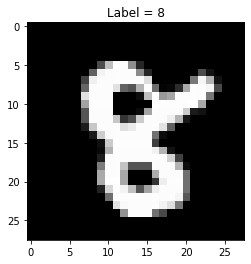

In [ ]:
# Plot a random num
plt.rcParams["figure.figsize"] = (8, 4)
rand_indx = np.random.randint(len(images))
plt.imshow(images[rand_indx], cmap="gray")
plt.title(f"Label = {labels[rand_indx]}")


### Show at least 5 samples of each class (0-9)

### Create a smaller and more convinent array of digits

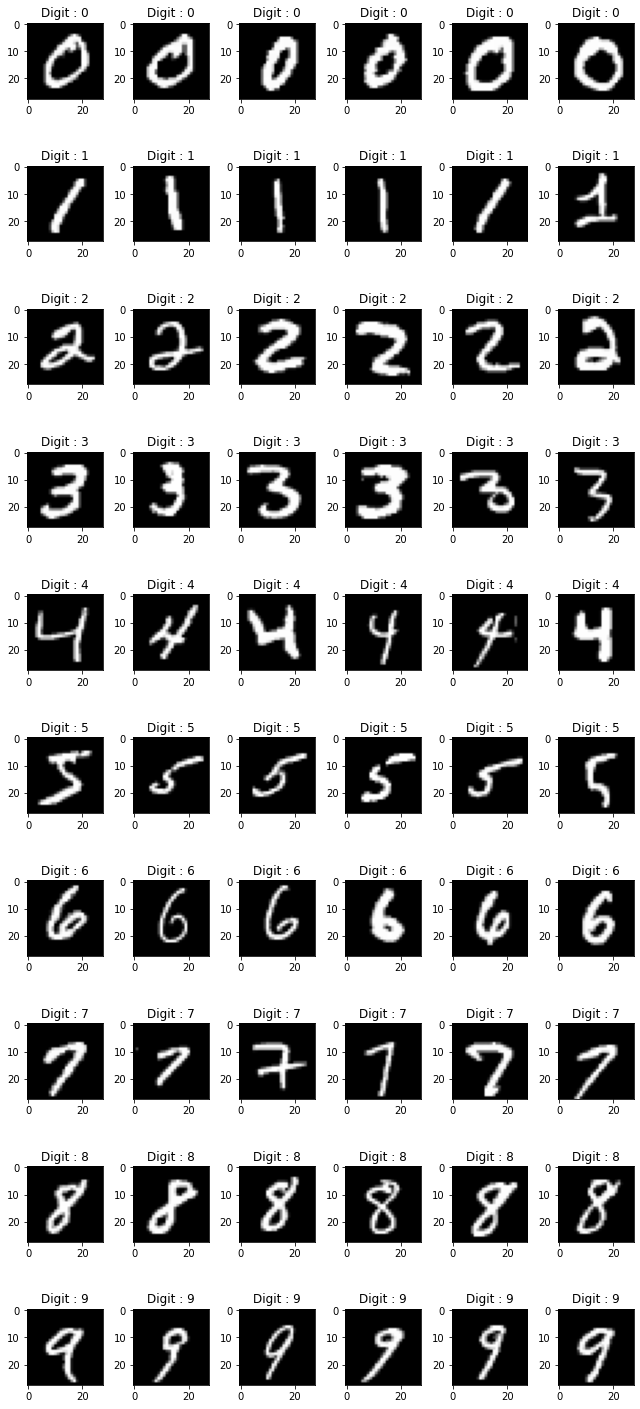

In [ ]:
new_arr = np.zeros((10,15), dtype=np.ndarray)

for i in range(10):
  pointer = 0
  for j in range(15):
    not_found = True
    while (not_found):
      if (labels[pointer] == i):
        new_arr[i][j] = images[pointer]
        not_found = False
        pointer +=1
      else:
        pointer +=1

# new_Arr now contains 15 images of each digits for further use in making the new classes
num_row = 10
num_col = 6

# plot images from new arr
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row):
  for j in range (num_col):

    ax = axes[i, j]  # get proper location in subplot
    ax.imshow(new_arr[i][j], cmap='gray')
    ax.set_title('Digit : {}'.format(i))

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import math
import numpy as np

def rotate(image, degree):
  
    # First we will convert the degrees into radians
    rads = math.radians(degree)

    # Rotated & original images are same size
    rot_img = np.uint8(np.zeros(image.shape))

    # Finding the center point of rotated (or original) image.
    height = rot_img.shape[0]
    width  = rot_img.shape[1]

    midx,midy = (width//2, height//2)

    for i in range(rot_img.shape[0]):
        for j in range(rot_img.shape[1]):
          # calculate new indexes
            x= (i-midx)*math.cos(rads)+(j-midy)*math.sin(rads) 
            y= -(i-midx)*math.sin(rads)+(j-midy)*math.cos(rads)
          # round it so we can actually use it
            x=round(x)+midx 
            y=round(y)+midy 
          # making sure we dont go out of image borders
            if (x>=0 and y>=0 and x<image.shape[0] and  y<image.shape[1]):
                rot_img[i,j] = image[x,y]  # copy pixels

    return rot_img 


### Create new classes

In [ ]:
from PIL import Image
import cv2

new_labels = ['000']
for i in range (1,100):
  if (i < 10):
    new_labels.append( "00" + str(i))
  else:
    new_labels.append( "0" + str(i))

new_labels.append('100')

# new data set of 3 digits images with 4000 examples each
new_df = np.zeros((101,20), dtype=np.ndarray)

for i in range (101):
  for j in range (20):
    first_digit = int(new_labels[i][0])
    first_digit_img = new_arr[first_digit][np.random.randint(15)]   # grab a random image out of 15 images for the first digit and do the same for the second and third digits

    second_digit = int(new_labels[i][1])
    second_digit_img = new_arr[second_digit][np.random.randint(15)]
    
    third_digit = int(new_labels[i][2])
    third_digit_img = new_arr[third_digit][np.random.randint(15)]

    new_df[i][j] = cv2.hconcat([first_digit_img, second_digit_img, third_digit_img])



In [ ]:
# an example of what we've got
num_row = 101
num_col = 1

# plot images from new arr
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row):
  for j in range (num_col):

    ax = axes[i]  # get proper location in subplot
    ax.imshow(new_df[i][j], cmap='gray')
    ax.set_title('Digit : {}'.format(i))

plt.tight_layout()
plt.show()

 Use the augmentations you created on lab 3 on your new dataset and show some results and
explain which augmentations are applicable to this specific dataset, which are not and why.
* cropping the images will not applicable because they are already small enough and we will lose data by cropping them
* rotating the image will work yet only a very small rotation so the image is still understandable
* sobel x / sobel y / edge detection will do no good either because it will damage the data too much to work on it
* Sharpening/blurring will work well here because they dont affect the size of the image and do not cause data loss (using 'same' mode for borders)

In [ ]:
from scipy.signal import correlate2d

gaussian = np.random.normal(size=(3, 3), scale=0.5)

laplacian_sharpper = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")



for i in range (10):
  for j in range (4):
    if (j % 3 == 1): # blur
      new_df[i][j] = correlate2d(new_df[i][j], gaussian, mode="same")

    if (j % 3 == 2): # sharpen
      new_df[i][j] =  correlate2d(new_df[i][j], laplacian_sharpper, mode="same")

    if (j % 3 == 0): # rotate 2 degress
      new_df[i][j] = rotate(new_df[i][j], 0.5)



### Show what we've got:

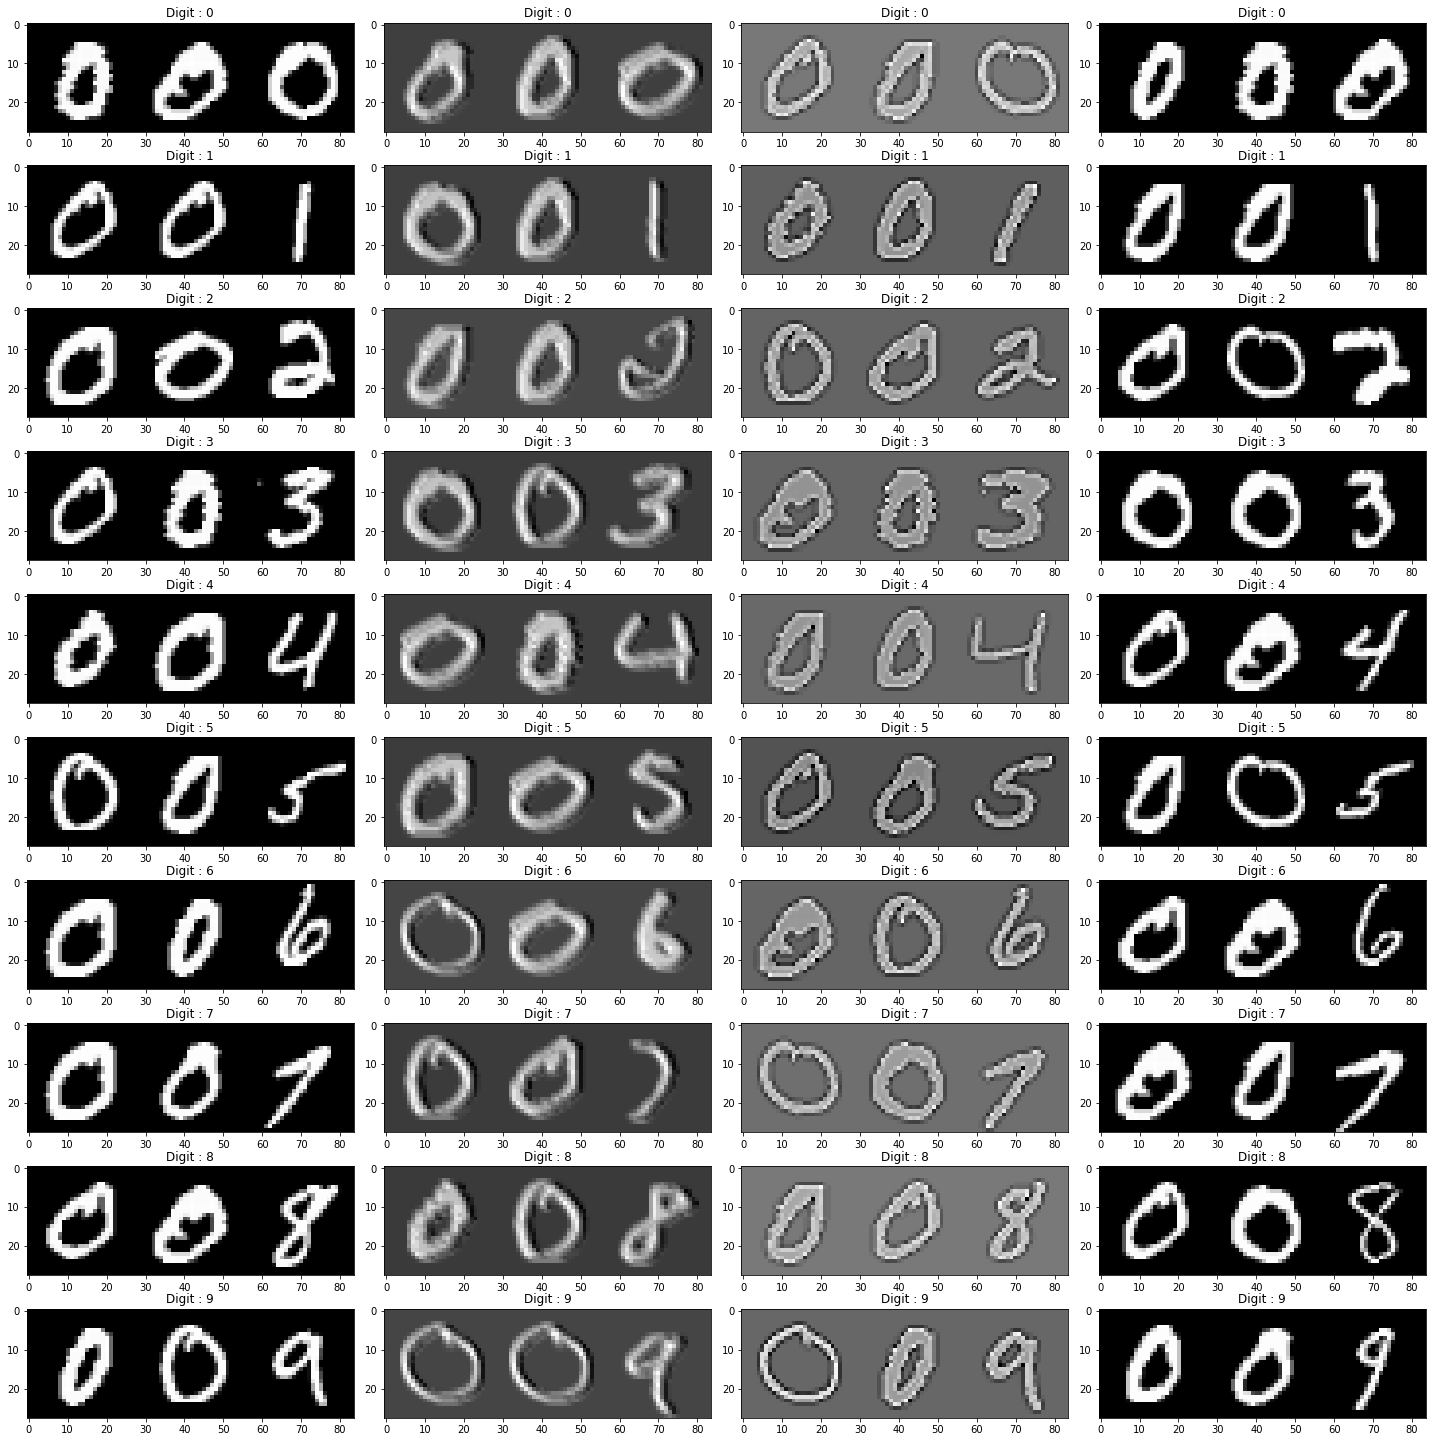

In [ ]:
num_row = 10
num_col = 4

# plot images from new arr
fig, axes = plt.subplots(num_row, num_col, figsize=(20,20))
for i in range(num_row):
  for j in range (num_col):

    ax = axes[i][j]  # get proper location in subplot
    ax.imshow(new_df[i][j], cmap='gray')
    ax.set_title('Digit : {}'.format(i))

plt.tight_layout()
plt.show()

#### Summary (1 out of 2)
I'v started by understanding this dataset so i can use it to create the new dataset:
* working together with the labels and images arrays 
* instead of searching every single image, I made a smaller matrix so the work will be easier and every row  represents a digit

After that was done, I contacenated the images vertically to create a 3 digit number from 000 to 100. </br>

Later on I applied the right augmentation for this job

# 2 - Shapes Dataset

In [ ]:
import cv2
shape_set = np.zeros(1000, dtype=np.ndarray)

width = 50
height = 50

for i in range(1000):
  blank_img = np.zeros([height, width, 3], dtype=np.uint8)
  shape_set[i] = blank_img

# blank image set


In [ ]:
from numpy.core.numeric import isclose
# draw shapes

for i in range(1000):
  if (i % 3 == 0): # draw rectangle

    cv2.rectangle(shape_set[i], (np.random.randint(low=10,high=20),np.random.randint(low=10,high=20)), (np.random.randint(low=27,high=47),np.random.randint(low=30,high=47)), color=(np.random.randint(255),np.random.randint(255),np.random.randint(255)) )

  if (i % 3 == 1):

    cv2.circle(shape_set[i], (np.random.randint(low=20,high=30),np.random.randint(low=20,high=30)), np.random.randint(low=10,high=15), color=(np.random.randint(255),np.random.randint(255),np.random.randint(255)) )

  if (i % 3 == 2):
    # triangle points
    triangle = np.array([[np.random.randint(low=20,high=30),np.random.randint(low=10,high=18)],[np.random.randint(low=10,high=15),np.random.randint(low=30,high=47)],[np.random.randint(low=40,high=45),np.random.randint(low=40,high=45)]], np.int32)

    cv2.polylines(shape_set[i], [triangle] , isClosed=True, color=(np.random.randint(255),np.random.randint(255),np.random.randint(255)) )


In [ ]:

def array2subplots(arr: np.ndarray, num_row: int, num_col: int):
  fig, axes = plt.subplots(num_row, num_col, figsize=(20,20))
  for i in range(num_row):
    for j in range (num_col):

      ax = axes[i][j]  # get proper location in subplot
      ax.imshow(arr[i * num_col + j], cmap='gray')

  plt.tight_layout()
  plt.show()

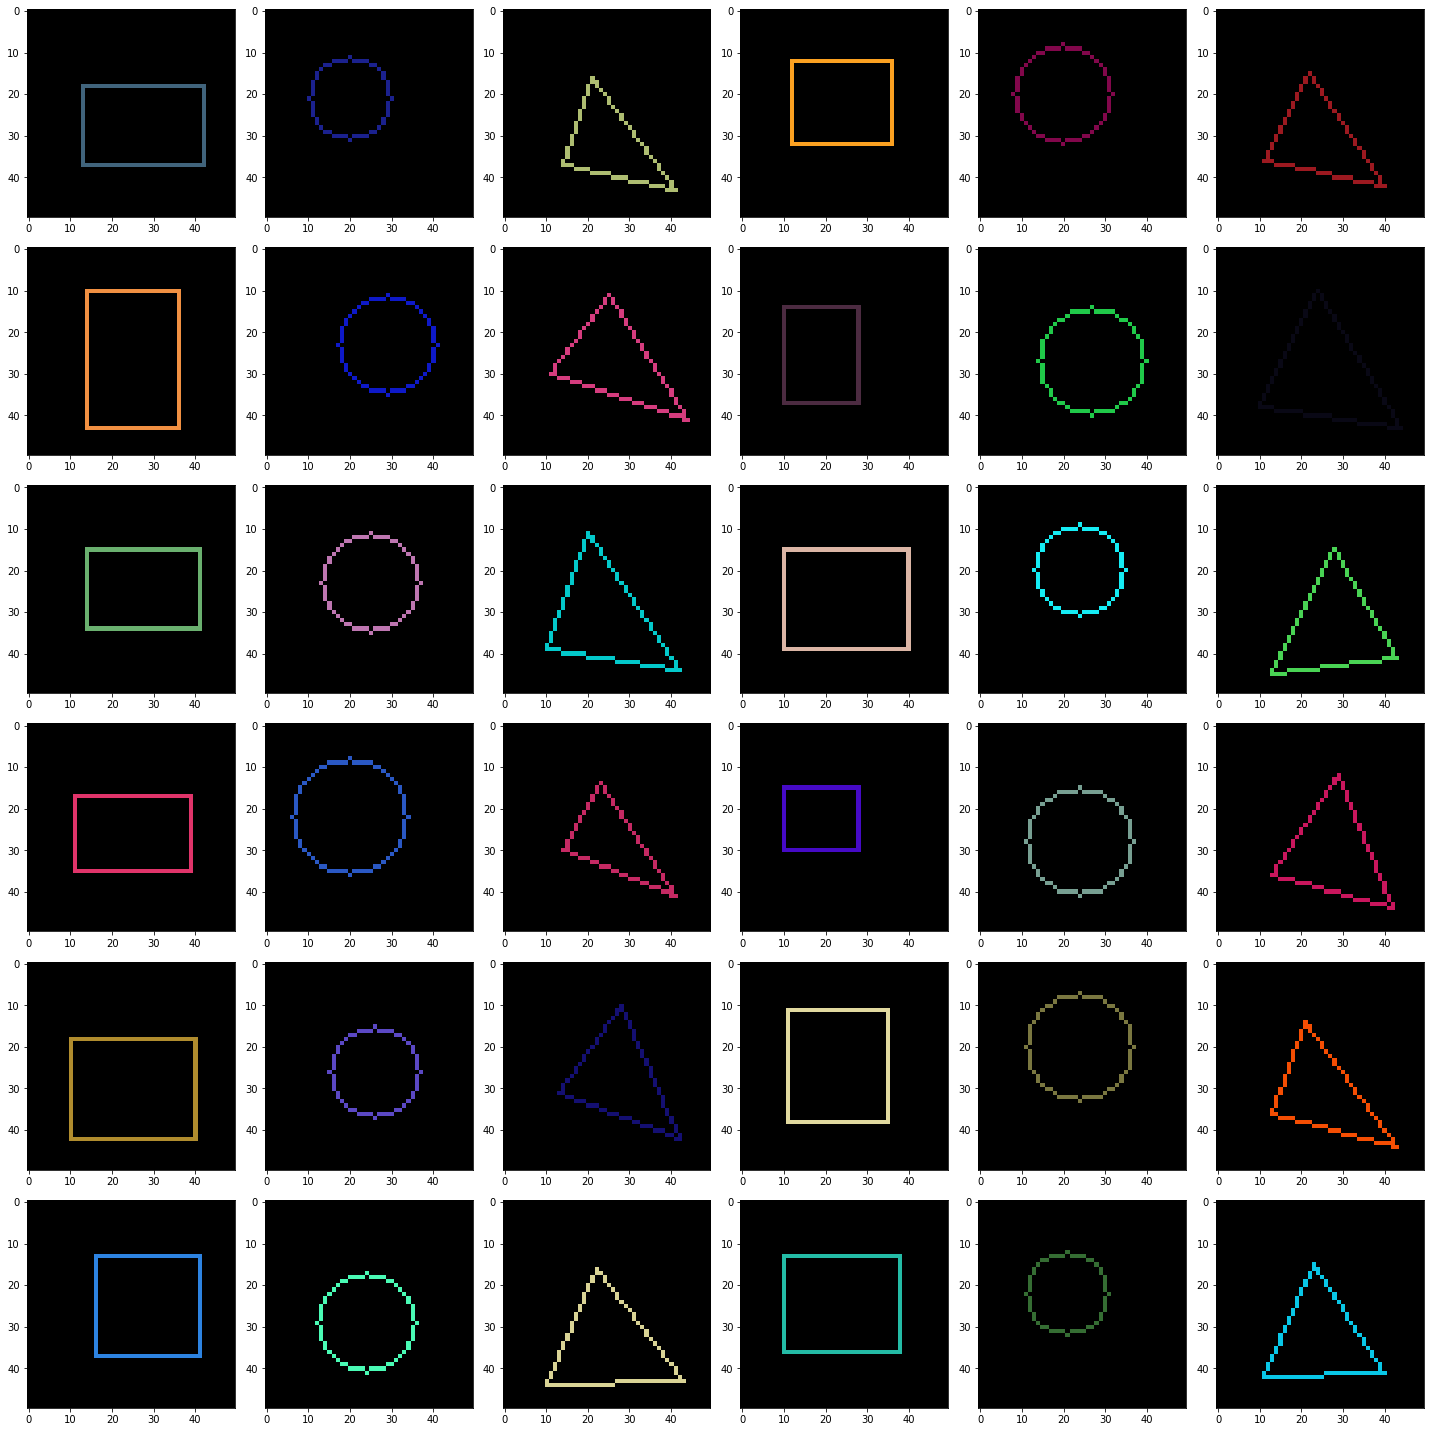

In [ ]:
array2subplots(shape_set, 6,6)

with the augmentations from lab 3:


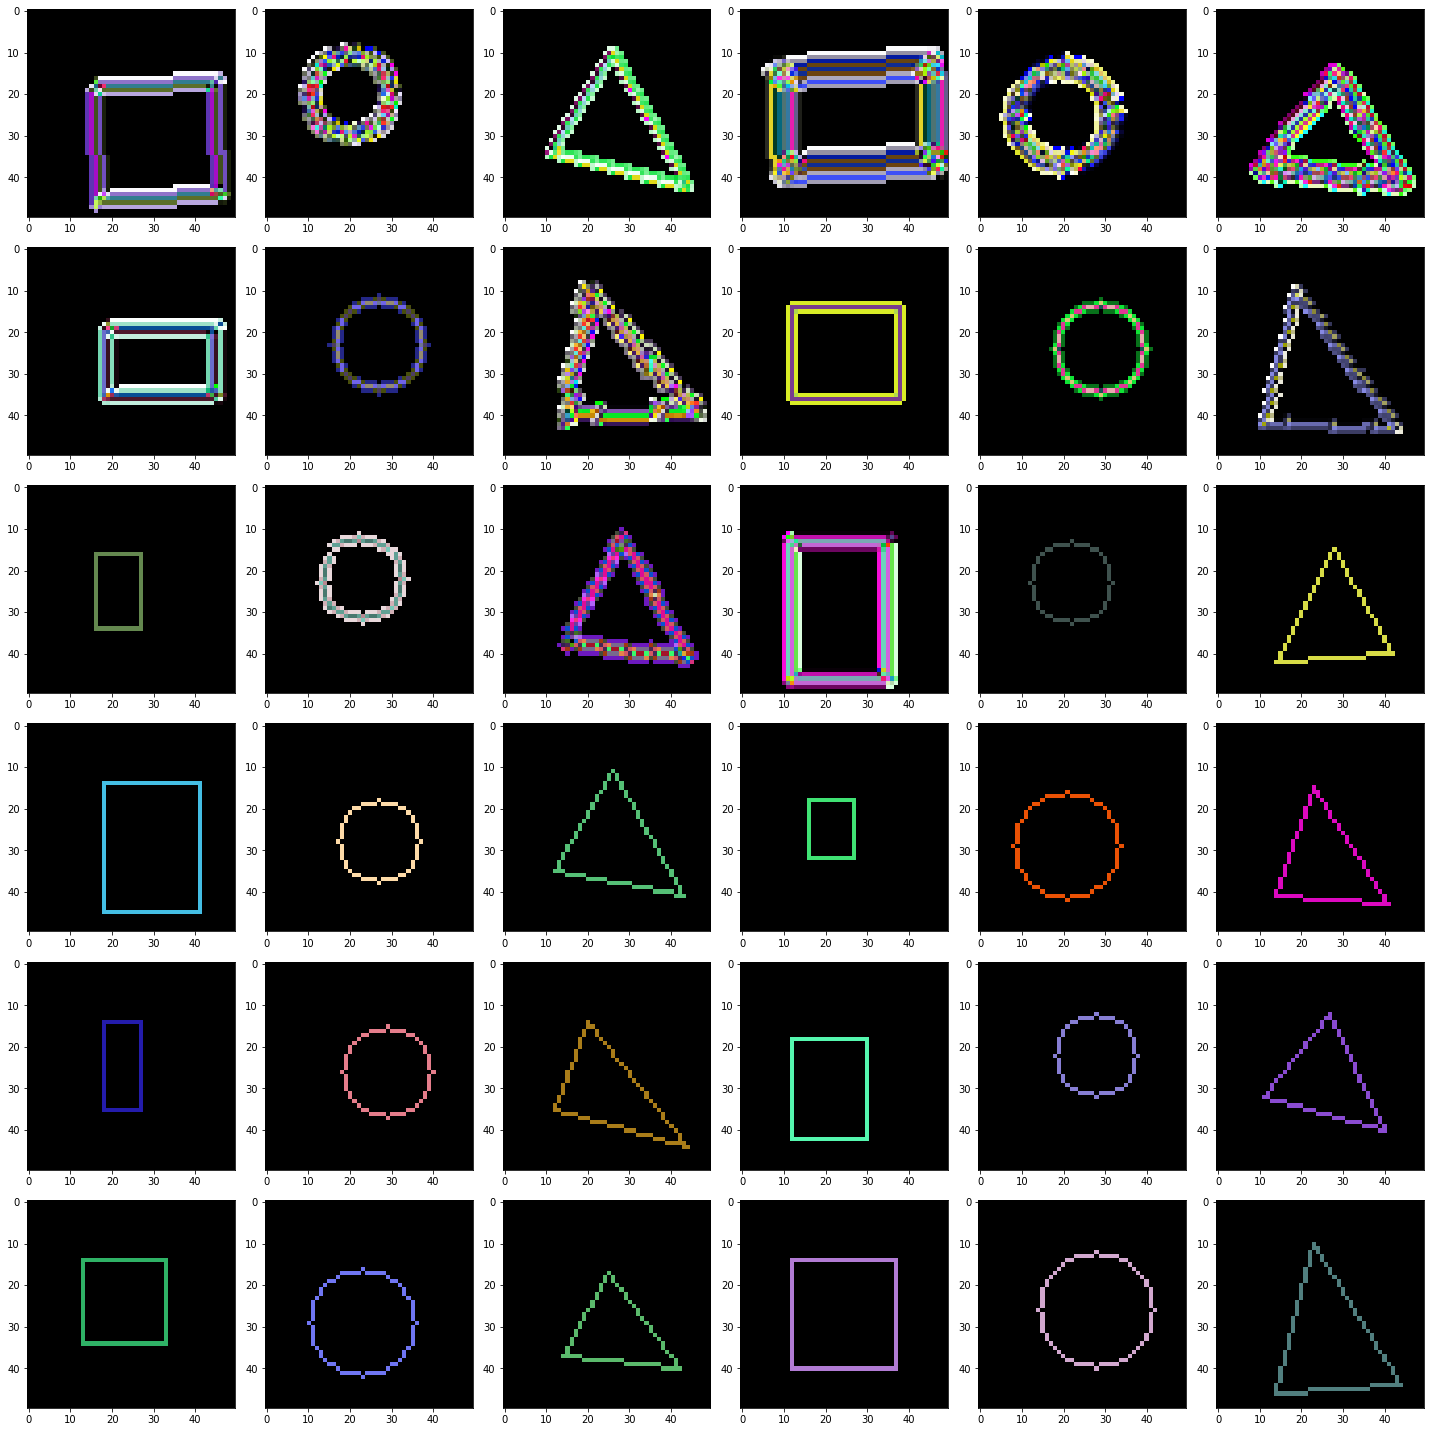

In [ ]:
from scipy.signal import correlate2d

gaussian = np.random.normal(size=(3, 3), scale=0.5)

laplacian_sharpper = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

num_col = 4
for i in range (4):
  for j in range (4):
    if (np.random.randint(20) % 3 == 1): # blur
      shape_set[i * num_col + j][:,:,0] = correlate2d(shape_set[i * num_col + j][:,:,0], gaussian, mode="same")
      shape_set[i * num_col + j][:,:,1] = correlate2d(shape_set[i * num_col + j][:,:,1], gaussian, mode="same")
      shape_set[i * num_col + j][:,:,2] = correlate2d(shape_set[i * num_col + j][:,:,2], gaussian, mode="same")

    if (np.random.randint(20) % 3 == 2): # sharpen
      shape_set[i * num_col + j][:,:,0] = correlate2d(shape_set[i * num_col + j][:,:,0], laplacian_sharpper, mode="same")
      shape_set[i * num_col + j][:,:,1] = correlate2d(shape_set[i * num_col + j][:,:,1], laplacian_sharpper, mode="same")
      shape_set[i * num_col + j][:,:,2] = correlate2d(shape_set[i * num_col + j][:,:,2], laplacian_sharpper, mode="same")
      
    if (np.random.randint(20) % 3 == 0): # sharpen
      shape_set[i * num_col + j][:,:,0] = rotate(shape_set[i * num_col + j][:,:,0], 3)
      shape_set[i * num_col + j][:,:,1] = rotate(shape_set[i * num_col + j][:,:,1], 3)
      shape_set[i * num_col + j][:,:,2] = rotate(shape_set[i * num_col + j][:,:,2], 3)
      



array2subplots(shape_set, 6,6)

Write a class, which loads the data you created, labels the data, i.e (triangle will be class 0,
rectangle 1, etc.. an Integer) and splits it to train and test sets. 90% of the data should be train
images and 10% test images. The class call should be as follows: *italicized text*

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

class Data:
  
  def __init__(this, data):
    this.data = pd.DataFrame()
    this.data.insert(column='images', value=data,loc=0)
    this.len = len(data)

  def show(this):
    display(this.data)

  # set proper labels for the data
  def set_labels(this):
    labels = []
    for i in range(this.len):
      if (i % 3 == 0): #  rectangle
        labels.append(1)
      if (i % 3 == 1):  #circle
        labels.append(2)
      if (i % 3 == 2):  # triangle
        labels.append(0)

    this.data.insert(column='labels', value=labels, loc=1)

  # split to two groups - 90% train , 10% test
  def split_train_test(this):
    t = this.data['labels']
    X = this.data['images']
    return sklearn.model_selection.train_test_split(X, t, test_size=0.1, random_state=2)

df = Data(shape_set)
df.set_labels()
df.show()

X_train, X_test, t_train, t_test = df.split_train_test()

,images,labels
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
...,...,...
995,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
996,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
997,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
998,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0


In [ ]:
display(X_train, t_train)

653    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
258    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
951    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
396    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
557    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
                             ...                        
534    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
584    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
493    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
527    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
168    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: images, Length: 900, dtype: object

653    0
258    1
951    1
396    1
557    0
      ..
534    1
584    0
493    2
527    0
168    1
Name: labels, Length: 900, dtype: int64

We can see we got the data splitted the way we wanted, randomly 

#### Summary 2
This job was a little bit tricky considering the fact we had to build everything from scratch so i got a chance to improve my python skills and thinkikng skills at these kind of exercises.
* I started by making an array for the images and then i filled it in different shapes when each shapes has approx. 330 examples
* making each shape in the right dimensions and shape was a bit challenging but i got it done with a little trial and error
* making the class and splitting the test was very good for the practice

Overall, i really think this exercise summarised really well what we did the past month and really got me dealing with coding the hard way and i think it really improved my understanding.